# Pacotes

In [1]:
# Processamentos de dados
import pandas as pd
import nltk
import re

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Auxiliares
import os

# Definindo parâmetros
os.chdir(os.getcwd())
os.chdir('..')

sns.set_palette("dark")
sns.set_style("whitegrid")

In [2]:
# Downloads complementares do nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/gbrlmoraes/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gbrlmoraes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import dos dados

In [3]:
df = pd.read_parquet(r'dados/treino.parquet')
df.head()

,statement,status
0,Frankly people that ask me to do shit are the ...,Suicidal
1,life is just working hard at school so you can...,Depression
2,22 M. I am stuck in a rut. I am angry all the ...,Depression
3,gaindaswamy ye kon si ameero wali bimari hai m...,Depression
4,i don t understand i got the dream girl and i ...,Depression


# Análise Exploratória

## Consistência dos dados

### Dados faltantes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42434 entries, 0 to 42433
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  42131 non-null  object
 1   status     42434 non-null  object
dtypes: object(2)
memory usage: 663.2+ KB


In [5]:
df.isna().mean() * 100

statement    0.71405
status       0.00000
dtype: float64

In [6]:
# Podemos ver que apenas 0.71% das linhas estão nulas, então podemos remove-las sem problema
df.dropna(inplace = True)

### Dados duplicados
- Várias linhas estão duplicadas, mas apenas uma contêm multiplos valores de status para a mesma frase, então vamos remover todas as duplicatas e filtrar a frase problemática

In [9]:
df['statement'].duplicated().sum()

1052

In [28]:
dfdf = df.groupby(['statement'])['status'].apply(set).reset_index()
dfdf

,statement,status
0,"\tIt was the summer, I had just started a new ...",{Normal}
1,...,{Stress}
2,"He grew from a short, stubby, orange hair...",{Normal}
3,When we had our first fight I did EVERYTHIN...,{Normal}
4,**tl;dr**: I've [18 F] been into my friend [...,{Stress}
...,...,...
41073,€ SHARING NETFLIX PREMIUM âœ¨ã€'..âž¥ NETFLIX ...,{Normal}
41074,™†ðŸ rwoq,{Normal}
41075,● active staff members ● active support staff ...,{Normal}
41076,❤️ This group makes me realize that we all suf...,{Depression}


In [29]:
dfdf[dfdf['status'].apply(len) > 2]

,statement,status


In [27]:
df = df[df['statement'] != '#NAME?']
df.drop_duplicates(subset = 'statement', inplace = True)

print(f'Dimensões finais do dataset de treino: {df.shape}')

,statement,status
0,Frankly people that ask me to do shit are the ...,Suicidal
1,life is just working hard at school so you can...,Depression
2,22 M. I am stuck in a rut. I am angry all the ...,Depression
3,gaindaswamy ye kon si ameero wali bimari hai m...,Depression
4,i don t understand i got the dream girl and i ...,Depression
...,...,...
42429,The birds chirp so I will die.is not it funny ...,Suicidal
42430,#Success consists of going from failure to fai...,Normal
42431,i ve never been one to feel anxious or thought...,Depression
42432,And that will return my depression. I feel tha...,Depression


## Visão geral das classes

- As categorias não estão igualmente distribuidas

<Figure size 600x200 with 0 Axes>

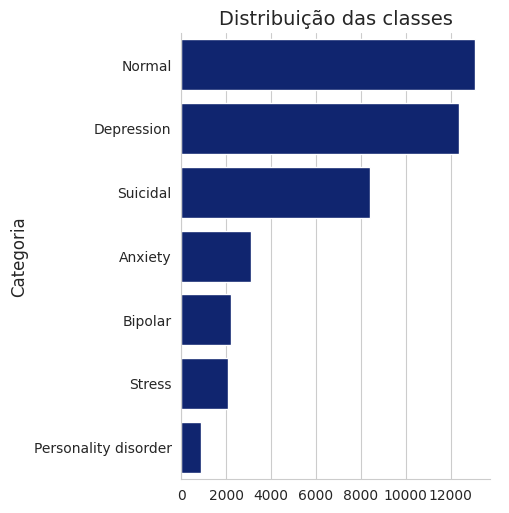

In [7]:
gdata = df['status'].value_counts()

plt.figure(figsize = (6, 2))
sns.catplot(
    x = gdata.values,
    y = gdata.index,
    kind = 'bar'
)
plt.ylabel('Categoria', fontsize = 12)
plt.title('Distribuição das classes', fontsize = 14)
plt.show()

## Palavras mais comuns em cada classe

In [8]:
def pre_processamento(texto):
  """
  Função para pré-processar o texto antes da contagem de palavras.

  Argumentos:
    texto (str): O texto a ser pré-processado.

  Retorno:
    lista: Uma lista contendo as palavras limpas e normalizadas.
  """
  # Remover pontuação
  texto = re.sub(r'[^\w\s]', '', texto)

  # Tokenizar o texto em palavras
  palavras = nltk.word_tokenize(texto)

  # Normalizar as palavras para minúsculas
  palavras = [palavra.lower() for palavra in palavras]

  # Remover stop words e palavras comuns no contexto de relato
  stop_words = nltk.corpus.stopwords.words('english')
  palavras_filtradas = [palavra for palavra in palavras if palavra not in stop_words and palavra not in ['im', 'like', 'feel']]

  return palavras_filtradas

In [9]:
n_palavras = 10

for categoria in df['status'].unique():

    print(categoria)

    df_cat = df.query(f'status == "{categoria}"').copy()
    df_cat['statement'] = df_cat['statement'].apply(pre_processamento)

    # Juntando todas as palavras de todas as frases da categoria filtrada
    todas_palavras = []
    for lista in df_cat['statement']:
        todas_palavras.extend(lista)

    # Contando as palavras e retornando uma lista com as mais comuns
    contagem = nltk.FreqDist(todas_palavras)
    palavras_mais_comuns = contagem.most_common(n_palavras)

    print(pd.Series(palavras_mais_comuns))
    print('\n')

Suicidal
0       (want, 8438)
1       (life, 5969)
2       (know, 5079)
3      (would, 4517)
4        (get, 4068)
5       (even, 4042)
6    (anymore, 3715)
7     (people, 3687)
8      (going, 3374)
9       (time, 3294)
dtype: object


Depression
0          (want, 9807)
1          (life, 8840)
2          (know, 8690)
3           (get, 7965)
4          (even, 7362)
5          (time, 6630)
6        (people, 6283)
7         (would, 5925)
8        (really, 5773)
9    (depression, 5129)
dtype: object


Normal
0      (want, 897)
1      (dont, 812)
2       (get, 694)
3    (really, 684)
4      (time, 664)
5        (go, 619)
6       (one, 615)
7      (know, 584)
8      (good, 543)
9     (would, 491)
dtype: object


Personality disorder
0      (dont, 1035)
1    (people, 1022)
2       (know, 654)
3       (even, 651)
4        (ive, 538)
5       (want, 524)
6        (get, 518)
7     (really, 493)
8       (avpd, 490)
9       (life, 490)
dtype: object


Bipolar
0        (ive, 1818)
1       (dont, 1760

## Bigrames mais comuns em cada classe

In [10]:
n_bigramas = 10

for categoria in df['status'].unique():

    print(categoria)

    df_cat = df.query(f'status == "{categoria}"').copy()
    df_cat['statement'] = df_cat['statement'].apply(pre_processamento)

    # Juntando todas as palavras de todas as frases da categoria filtrada
    todos_bigramas = []
    for lista in df_cat['statement']:
        todos_bigramas.extend(list(zip(lista, lista[1:])))

    # Contando as palavras e retornando uma lista com as mais comuns
    contagem = nltk.FreqDist(todos_bigramas)
    bigramas_mais_comuns = contagem.most_common(n_bigramas)

    print(pd.Series(bigramas_mais_comuns))
    print('\n')

Suicidal
0        ((take, anymore), 1400)
1        ((anymore, take), 1268)
2            ((want, die), 1174)
3           ((get, better), 464)
4            ((every, day), 418)
5    ((suicidal, thoughts), 393)
6             ((die, want), 387)
7            ((want, live), 351)
8           ((wish, could), 343)
9            ((want, kill), 327)
dtype: object


Depression
0    ((mental, health), 731)
1       ((get, better), 661)
2        ((every, day), 649)
3      ((even, though), 601)
4         ((want, die), 520)
5      ((anyone, else), 465)
6       ((wish, could), 432)
7     ((take, anymore), 429)
8        ((even, know), 402)
9       ((every, time), 399)
dtype: object


Normal
0      ((dont, know), 107)
1     ((even, though), 97)
2       ((dont, want), 82)
3         ((want, go), 67)
4      ((last, night), 65)
5          ((gon, na), 61)
6          ((oh, god), 54)
7    ((good, morning), 52)
8          ((wan, na), 49)
9      ((first, time), 46)
dtype: object


Personality disorder
0        ((don